2. Implement dimensionality reduction algorithms on two datasets



In [1]:
pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


In [3]:
def categorize_income(income):

    if '<=50K' in income:
        return 0
    elif '>50K' in income:
        return 1
    else:
        print(income)
        return None  # or handle other cases as needed

def grab_adult_income_dataset():
    # Fetch dataset
    adult = fetch_ucirepo(id=2)

    # Data (as pandas dataframes)
    X = pd.DataFrame(adult.data.features)
    y = pd.DataFrame(adult.data.targets, columns=['income'])

    # Define categorical columns
    categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

    # Label encoding for categorical columns
    X[categorical_columns] = X[categorical_columns].apply(lambda col: pd.Categorical(col).codes)

    # Categorize 'income' column
    y['income'] = y['income'].apply(categorize_income)

    return X, y['income']


def preprocess_adult_income_data(X, y, test_size = 0.2, random_state=None):
  # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  y_train = y_train.values.reshape(-1)
  y_test = y_test.values.reshape(-1)

  return x_train, x_test, y_train, y_test



In [4]:
def grab_breast_cancer_dataset():
  # fetch dataset
  breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
  # data (as pandas dataframes)
  X = breast_cancer_wisconsin_diagnostic.data.features
  y = breast_cancer_wisconsin_diagnostic.data.targets

  return X,y

def preprocess_data(X, y, test_size=0.2, random_state=None):

  #Numerize y data
  y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})

  # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  y_train = y_train.values.reshape(-1)
  y_test = y_test.values.reshape(-1)


  return x_train, x_test, y_train, y_test


## PCA

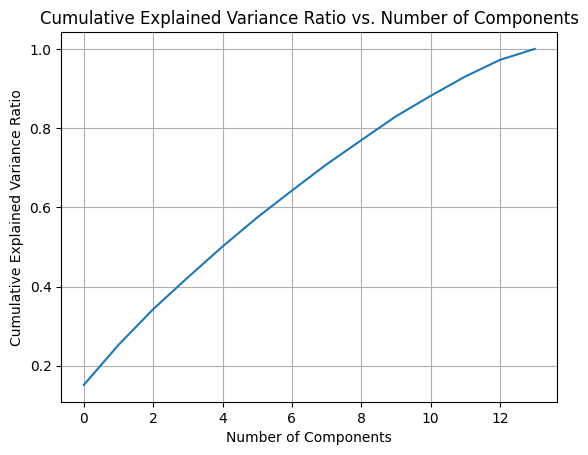

In [8]:
from sklearn.preprocessing import StandardScaler

X,y = grab_adult_income_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate explained variance ratio for different numbers of components
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

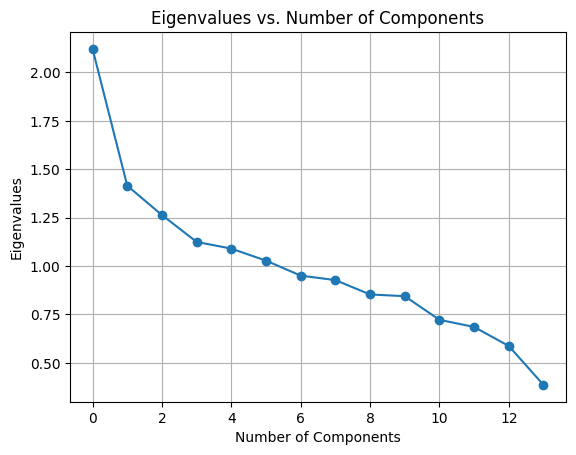

In [8]:
X,y = grab_adult_income_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate eigenvalues for different numbers of components
pca = PCA()
pca.fit(X_scaled)
eigenvalues = pca.explained_variance_

# Plot eigenvalues
plt.plot(eigenvalues, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues vs. Number of Components')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

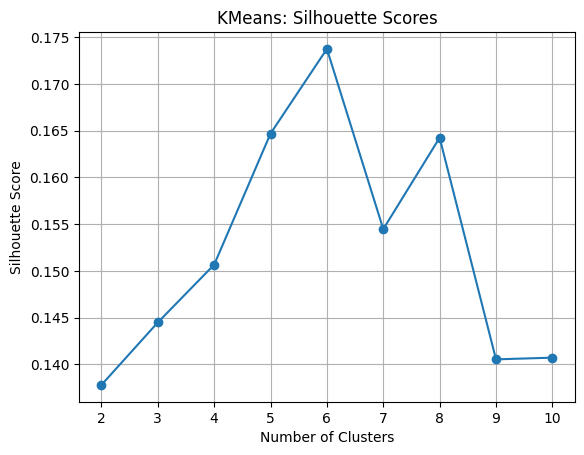

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml

#Grab the reduced dataset after PCA
X,y = grab_adult_income_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate eigenvalues for different numbers of components
pca = PCA(n_components = 14)
X_pca = pca.fit(X_scaled)
X = pca.transform(X_scaled)

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('KMeans: Silhouette Scores')
plt.grid(True)
plt.show()


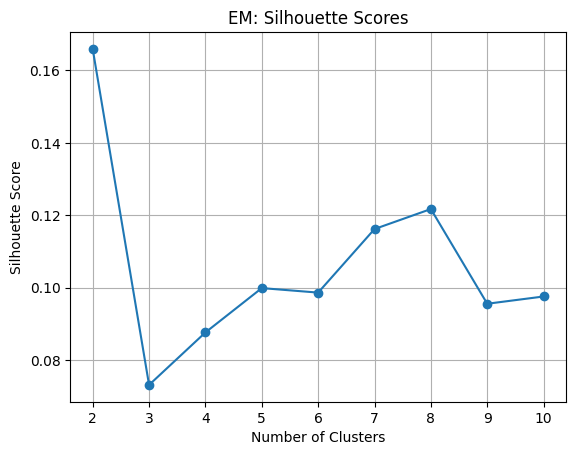

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.mixture import GaussianMixture


#Grab the reduced dataset after PCA
X,y = grab_adult_income_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate eigenvalues for different numbers of components
pca = PCA(n_components = 14)
X_pca = pca.fit(X_scaled)
X = pca.transform(X_scaled)

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = gmm.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('EM: Silhouette Scores')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Assuming X contains your dataset and y_true contains the true labels
X,y = grab_adult_income_dataset()
y_true = y.to_numpy().reshape(-1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate eigenvalues for different numbers of components
pca = PCA()
X_pca = pca.fit(X_scaled)
X = pca.transform(X_scaled)


em = GaussianMixture(n_components=2, random_state=10)
y_pred = em.fit_predict(X)

# Assuming y contains the true labels and y_pred contains the predicted cluster labels ('B' or 'M')

# Perform clustering with k=2 clusters (e.g., using KMeans)
# After clustering, you have the predicted cluster assignments in y_pred

# Initialize lists to store proportions of each class in each cluster
class_proportions_cluster0 = []
class_proportions_cluster1 = []

# Iterate over each class
for class_label in ['B', 'M']:
    # Get indices of data points belonging to the current class
    class_indices = np.where(y == class_label)[0]

    print(y_pred[class_indices])


    # Calculate proportion of data points in each cluster for the current class
    proportion_cluster0 = np.mean(y_pred[class_indices] == 1)
    proportion_cluster1 = np.mean(y_pred[class_indices] == 0)

    # Append proportions to the corresponding list
    class_proportions_cluster0.append(proportion_cluster0)
    class_proportions_cluster1.append(proportion_cluster1)

# Calculate label proportion agreement for each cluster
label_proportion_agreement_cluster0 = max(class_proportions_cluster0)
label_proportion_agreement_cluster1 = max(class_proportions_cluster1)

# Print or use label proportion agreement for analysis
print("Label Proportion Agreement for Cluster 0:", label_proportion_agreement_cluster0)
print("Label Proportion Agreement for Cluster 1:", label_proportion_agreement_cluster1)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Assuming X contains your dataset and y_true contains the true labels
X,y = grab_adult_income_dataset()
y_true = y.to_numpy().reshape(-1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate eigenvalues for different numbers of components
pca = PCA()
X_pca = pca.fit(X_scaled)
X = pca.transform(X_scaled)


kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(X)

# Assuming y contains the true labels and y_pred contains the predicted cluster labels ('B' or 'M')

# Perform clustering with k=2 clusters (e.g., using KMeans)
# After clustering, you have the predicted cluster assignments in y_pred

# Initialize lists to store proportions of each class in each cluster
class_proportions_cluster0 = []
class_proportions_cluster1 = []

# Iterate over each class
for class_label in ['B', 'M']:
    # Get indices of data points belonging to the current class
    class_indices = np.where(y == class_label)[0]

    print(y_pred[class_indices])


    # Calculate proportion of data points in each cluster for the current class
    proportion_cluster0 = np.mean(y_pred[class_indices] == 1)
    proportion_cluster1 = np.mean(y_pred[class_indices] == 0)

    # Append proportions to the corresponding list
    class_proportions_cluster0.append(proportion_cluster0)
    class_proportions_cluster1.append(proportion_cluster1)

# Calculate label proportion agreement for each cluster
label_proportion_agreement_cluster0 = max(class_proportions_cluster0)
label_proportion_agreement_cluster1 = max(class_proportions_cluster1)

# Print or use label proportion agreement for analysis
print("Label Proportion Agreement for Cluster 0:", label_proportion_agreement_cluster0)
print("Label Proportion Agreement for Cluster 1:", label_proportion_agreement_cluster1)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##ICA

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Explained Variance Ratio: [0.15151402 0.10106384 0.09024243 0.0803396  0.07786416 0.07342814
 0.06790936 0.06624854 0.06095817 0.06032434 0.05160148 0.04896843
 0.04194644 0.02759104]
Reconstruction Error: 0.7474221341317454


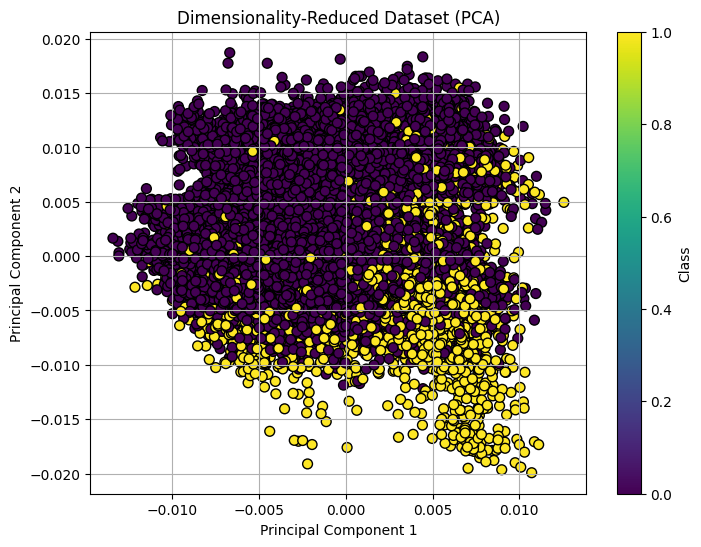

Original data shape: (48842, 14)
Transformed data shape after PCA: (48842, 2)
Number of features reduced: 12


In [11]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.decomposition import FastICA


X,y = grab_adult_income_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ica = FastICA(n_components=2, random_state=42)  # Specify the number of components to keep
X_ica = ica.fit_transform(X_scaled)

# Encode class labels as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Reconstruction Error
X_reconstructed = ica.inverse_transform(X_ica)
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print("Reconstruction Error:", reconstruction_error)

# General Performance (e.g., clustering performance or visualization)
# For demonstration purposes, you can print the reduced data
# Plot the reduced dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y_encoded, cmap='viridis', edgecolor='k', s=50)
plt.title('Dimensionality-Reduced Dataset (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

print("Original data shape:", X.shape)
print("Transformed data shape after PCA:", X_ica.shape)
print("Number of features reduced:", X.shape[1] - X_ica.shape[1])


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whi

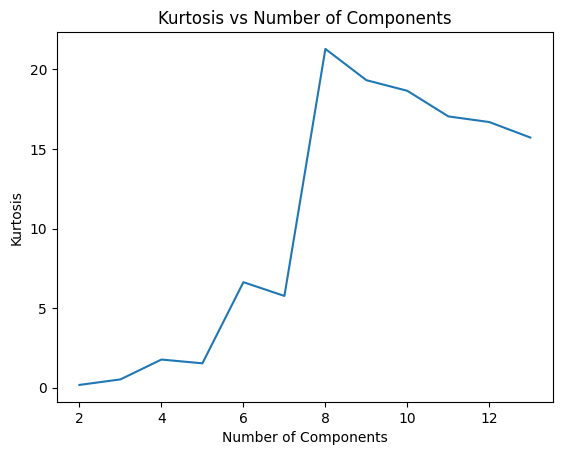

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

X,y = grab_adult_income_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components_range = range(2, 14)

kurtosis_values = []

for n_components in n_components_range:
    ica = FastICA(n_components=n_components)
    transformed_data = ica.fit_transform(X_scaled)
    kurtosis_values.append(kurtosis(transformed_data).mean())


plt.plot(n_components_range, kurtosis_values)
plt.xlabel("Number of Components")
plt.ylabel("Kurtosis")
plt.title("Kurtosis vs Number of Components")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


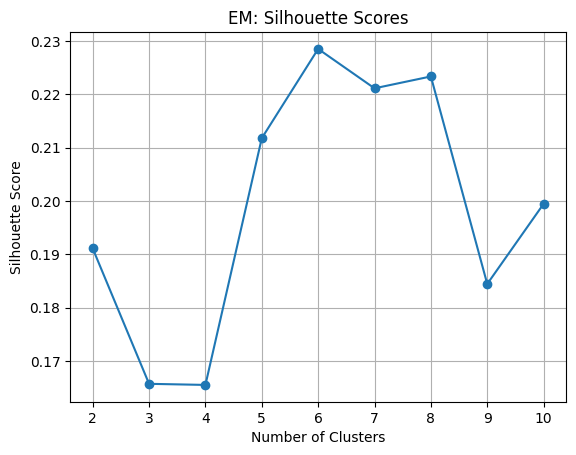

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import FastICA



#Grab the reduced dataset after PCA
X,y = grab_adult_income_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate eigenvalues for different numbers of components

ica = FastICA(n_components=5)
X = ica.fit_transform(X_scaled)

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = gmm.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('EM: Silhouette Scores')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will ch

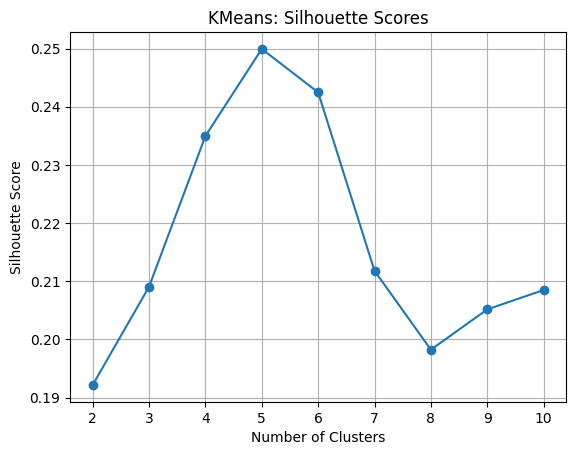

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.mixture import GaussianMixture


#Grab the reduced dataset after PCA
X,y = grab_adult_income_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate eigenvalues for different numbers of components
ica = FastICA(n_components=5)
X = ica.fit_transform(X_scaled)

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('KMeans: Silhouette Scores')
plt.grid(True)
plt.show()


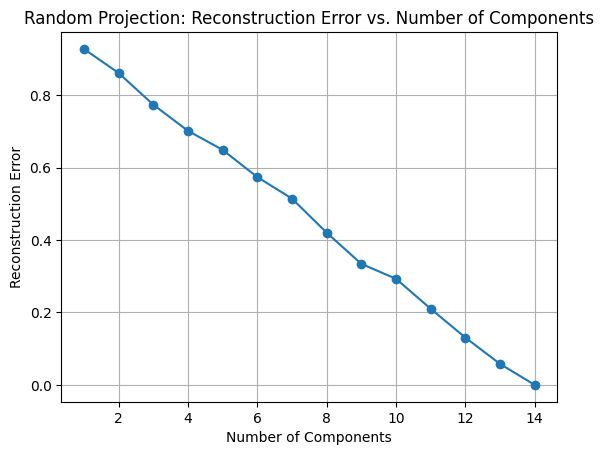

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Fetch the dataset
X,y = grab_adult_income_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of components
components_range = range(1, X.shape[1] + 1)

# Initialize an array to store reconstruction errors
errors = []

# Iterate over the range of components
for n_components in components_range:
    # Fit random projection
    rp = GaussianRandomProjection(n_components=n_components)
    X_projected = rp.fit_transform(X_scaled)

    # Reconstruct the data
    X_reconstructed = rp.inverse_transform(X_projected)

    # Calculate the error
    error = mean_squared_error(X_scaled, X_reconstructed)

    # Append the error to the list
    errors.append(error)

# Plot the average error versus number of components
plt.plot(components_range, errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Random Projection: Reconstruction Error vs. Number of Components')
plt.grid(True)
plt.show()


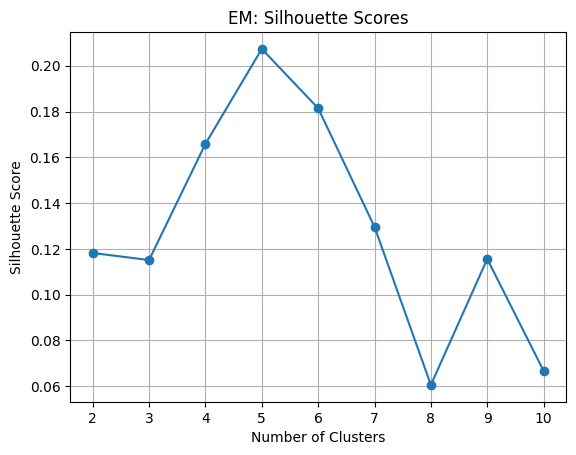

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.mixture import GaussianMixture


#Grab the reduced dataset after PCA
X,y = grab_adult_income_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate eigenvalues for different numbers of components

rp = GaussianRandomProjection(n_components=14)
X = rp.fit_transform(X_scaled)

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = gmm.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('EM: Silhouette Scores')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

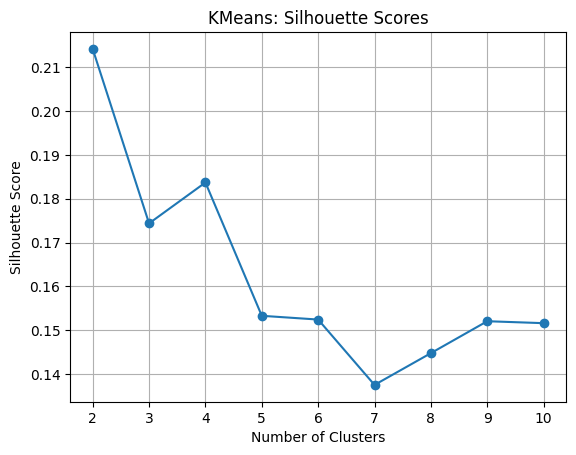

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.mixture import GaussianMixture


#Grab the reduced dataset after PCA
X,y = grab_adult_income_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate eigenvalues for different numbers of components

rp = GaussianRandomProjection(n_components=14)
X = rp.fit_transform(X_scaled)

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('KMeans: Silhouette Scores')
plt.grid(True)
plt.show()


Isotype

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap

# Load breast cancer dataset
X,y = grab_adult_income_dataset()

X, X_remainder, y, y_remainder = train_test_split(X, y, test_size=0.85, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of components
components_range = range(2, 6)

# Initialize an array to store reconstruction errors
errors = []

In [7]:
isomap = Isomap(n_components=2)
X_projected = isomap.fit_transform(X_scaled)

    # Reconstruct the data
X_reconstructed = isomap.fit_transform(X_projected)

    # Calculate the error
    #error = np.mean((X_scaled - X_reconstructed) ** 2)
error = isomap.reconstruction_error()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row

In [8]:
print(error)

4.61561922949029


In [9]:
for n_components in components_range:
    # Fit Isomap
    isomap = Isomap(n_components=n_components)
    X_projected = isomap.fit_transform(X_scaled)

    # Reconstruct the data
    X_reconstructed = isomap.fit_transform(X_projected)

    # Calculate the error
    #error = np.mean((X_scaled - X_reconstructed) ** 2)
    error = isomap.reconstruction_error()
    print(n_components, error)

    # Append the error to the list
    errors.append(error)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row

2 4.615619229490536


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row

3 16.84226090922078


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row

4 31.398971917366982


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row

5 50.61287947718685


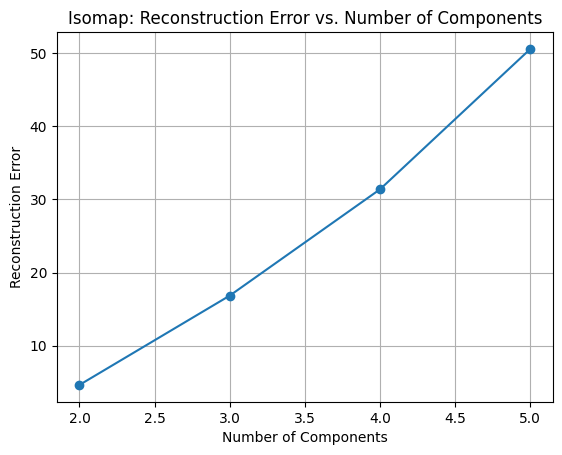

In [10]:
# Plot the reconstruction error versus number of components
plt.plot(components_range, errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Isomap: Reconstruction Error vs. Number of Components')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10

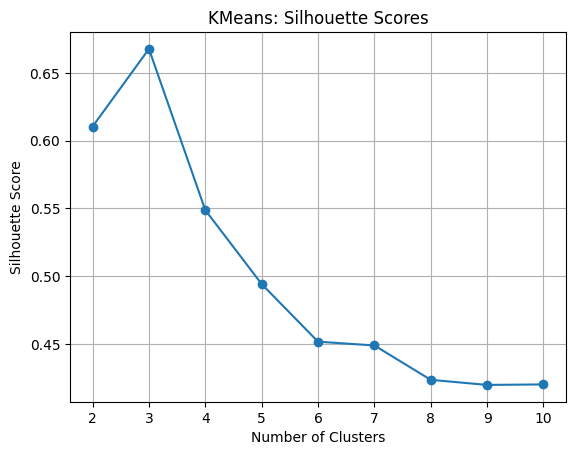

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.mixture import GaussianMixture
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler


#Grab the reduced dataset after PCA
X,y = grab_adult_income_dataset()
X, X_remainder, y, y_remainder = train_test_split(X, y, test_size=0.85, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

isomap = Isomap(n_components=2)
X = isomap.fit_transform(X_scaled)

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('KMeans: Silhouette Scores')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


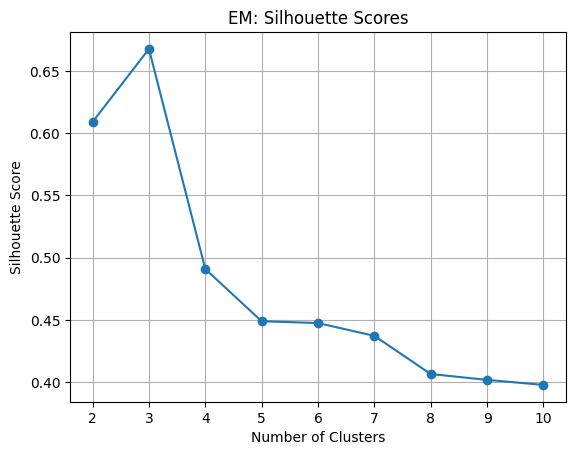

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.mixture import GaussianMixture
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler


#Grab the reduced dataset after PCA
X,y = grab_adult_income_dataset()
X, X_remainder, y, y_remainder = train_test_split(X, y, test_size=0.85, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

isomap = Isomap(n_components=2)
X = isomap.fit_transform(X_scaled)

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = gmm.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('EM: Silhouette Scores')
plt.grid(True)
plt.show()
